# Spectral response of the rugate filters

This notebook is about calculating the waveform for rugate filters for arbitrary wavelengths and filter shapes. For the detailed explanation of the theoretical aspects, see wiki.

Let' import the necessary modules. We have our own implementation of the Transfer Matrix Method in 'myTMM.py' module. Please see the dockstrings in the code for the explanation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myTMM import *

Here we are using the average refrative index value from this: https://www.photonics.com/Articles/Optical_Coating_Materials_and_Deposition/a25493.

We are using $n_p << n_a$, P as half the wavelength we want to be reflected and x to be reasonably small such that it remains in the order of the wavelength.

Here we are first trying to see analyze the spectral response for the blue, green and red light wavelength chosen for the refractive index profile.

In [17]:
def sinewave(n_a, n_p, P, phi, x):
    return 0.5*n_p*np.sin((2*np.pi*n_a*x/P + phi))

# Let's define all the parameters.
n_a = 2
n_p = 0.1
Pb = 450e-9/2 # Blue light
Pg = 550e-9/2 # Green light
Pr = 650e-9/2 # Red light
phi = np.pi

In [18]:
x = np.linspace(0,1e-5,501)
n_xb = n_a + sinewave(n_a, n_p, Pb, phi, x)
n_xg = n_a + sinewave(n_a, n_p, Pg, phi, x)
n_xr = n_a + sinewave(n_a, n_p, Pr, phi, x)

Text(0.05, 0.5, 'Refractive index')

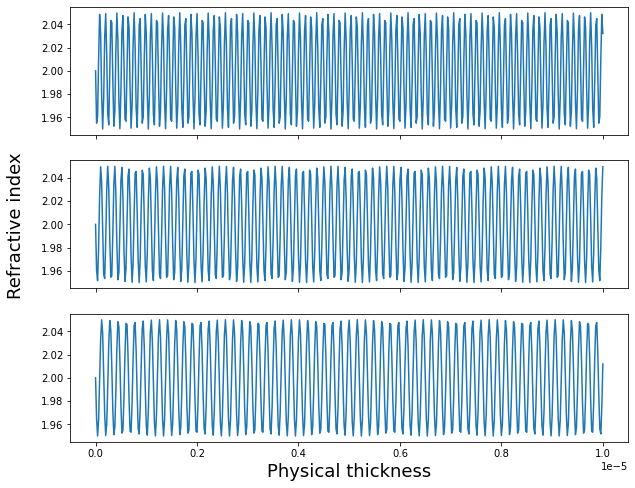

In [34]:
fig,ax = plt.subplots(3,1,figsize=(10, 8), sharex=True)
ax[0].plot(x ,n_xb)
ax[1].plot(x ,n_xg)
ax[2].plot(x, n_xr)
plt.xlabel("Physical thickness",  fontsize=14)
fig.text(0.05,0.5, "Refractive index", ha="center", va="center", rotation=90, fontsize=14)

In the refractive index plot, we can see that there is a visible difference in the wavelength. That small change can make the coating to reflect completely different light.

Now, let's  calculate the reflected power using our implementation and plot it for the wavelength.

In [21]:
l = np.linspace(400e-9,700e-9,601)
rg = np.zeros_like(l)
rb = np.zeros_like(l)
rr = np.zeros_like(l)
tg = np.zeros_like(l)
tb = np.zeros_like(l)
tr = np.zeros_like(l)
for j,lam in enumerate(l):
    rb[j],_ = TMM('s', n_xb, x, 0, lam)
    rg[j],_ = TMM('s', n_xg, x, 0, lam)
    rr[j],_ = TMM('s', n_xr, x, 0, lam)

Text(0.05, 0.5, 'Reflectance')

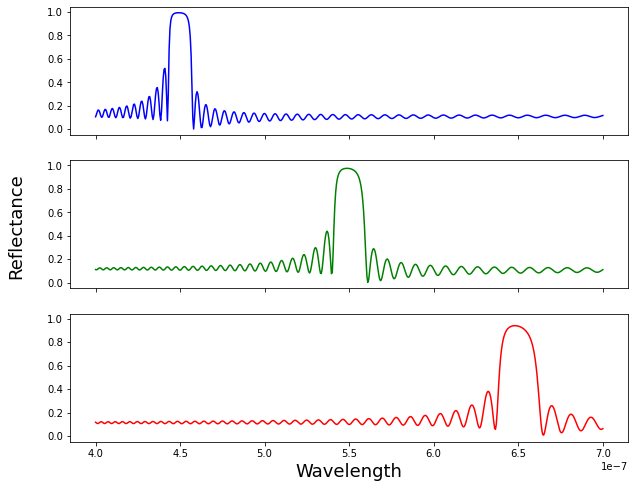

In [39]:
fig,ax = plt.subplots(3,1,figsize=(10,8), sharex=True, sharey=True)
ax[0].plot(l ,rb, c='b')
ax[1].plot(l ,rg, c='g')
ax[2].plot(l ,rr, c='r')
plt.xlabel("Wavelength",  fontsize=14)
fig.text(0.05,0.5, "Reflectance", ha="center", va="center", rotation=90, fontsize=14)

As we expected, the reflectance spectrum for all three cases shows exactly at the location of their respective wavelength. This is very useful because this also means that the other light has interfered with phase shift of $\pi$ because of the coating. So they got cancelled out. The energy is tranformed into the transmitted wave so we are actully losing less light with the rugate filters than without it.

Now let's combine two waves to get the purple color reflected. We need to add these waves in the refractive index profile.

In [13]:
x = np.linspace(0,1e-5,501)
n_xp = n_a + sinewave(n_a, n_p, Pb, phi, x) + sinewave(n_a, n_p, Pr, phi, x)

Text(0, 0.5, 'Refractive index')

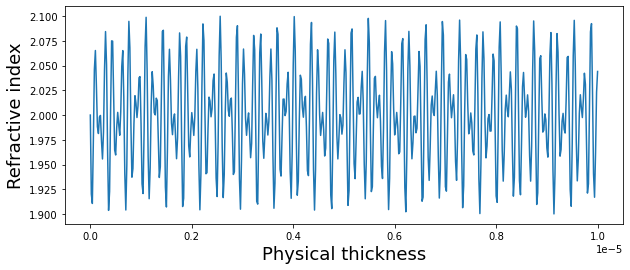

In [40]:
fig,ax = plt.subplots(1,1,figsize=(10, 4))
ax.plot(x ,n_xp)
plt.xlabel("Physical thickness", fontsize=14)
plt.ylabel("Refractive index", fontsize=14)

Here, the refractive index is now different. It has two sine wave profiles added.

In [23]:
l = np.linspace(400e-9,700e-9,601)
rp = np.zeros_like(l)
for j,lam in enumerate(l):
    rp[j],_ = TMM('s', n_xp, x, 0, lam)

Text(0, 0.5, 'Reflectance')

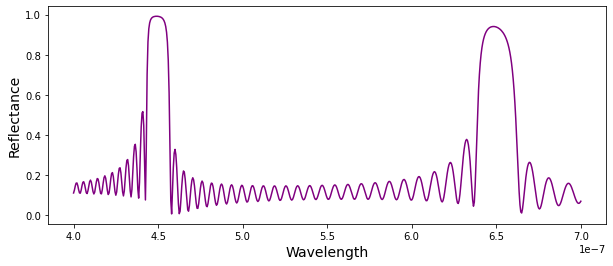

In [50]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(l ,rp, c='purple')
plt.xlabel("Wavelength",  fontsize=14)
plt.ylabel("Reflectance", fontsize=14)

The reflectance is high at blue and red light that makes it purple.

Let's now take a look at the filter for the infrared light waves. These are typically used in thermal imaging, astronomy, CO$_2$ laser, etc. We use Germanium (Ge) because it is very rare that has index of refraction ~4. It also naturally blocks UV and visible lights. So it is a very good candidate for the IR filters.

In [98]:
n_a = 4
n_p = 0.2
Pir = 4e-6/2
phi = np.pi

In [134]:
x = np.linspace(0,1e-4,501)
n_xir = n_a + sinewave(n_a, n_p, Pir, phi, x)

Text(0, 0.5, 'Refractive index')

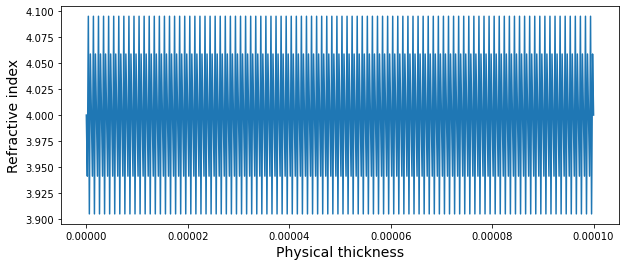

In [135]:
fig,ax = plt.subplots(1,1,figsize=(10, 4))
ax.plot(x ,n_xir)
plt.xlabel("Physical thickness", fontsize=14)
plt.ylabel("Refractive index", fontsize=14)

In [136]:
l = np.linspace(3e-6,5e-6,401)
rir = np.zeros_like(l)
for j,lam in enumerate(l):
    rir[j],_ = TMM('s', n_xir, x, 0, lam)

Text(0, 0.5, 'Reflectance')

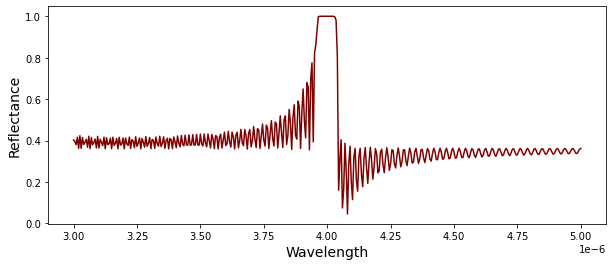

In [137]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(l ,rir, c='maroon')
plt.xlabel("Wavelength",  fontsize=14)
plt.ylabel("Reflectance", fontsize=14)

The reflectance is at 4$\mu$m wavelength